In [18]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from glob import glob
import re

In [19]:

DIR_data = 'C:/Users/sverrirhd/vedurgogn/'
URL_gauge_data = 'C:/Users/sverrirhd/Google Drive/Skóli/DTU/Thesis/Data/Rain gauges/'

DIR_rain_gauges = glob(URL_gauge_data + '*cleaned*')
rain_gauage_ids = [re.findall('[0-9][0-9][0-9][0-9]',i)[0] for i in DIR_rain_gauges]

In [59]:
gauges = pd.DataFrame([pd.read_pickle(i) for i in DIR_rain_gauges],index = rain_gauage_ids).T
gauges = gauges.loc[:,['1473','1475','1481','1485']]
# gauges = gauges.resample('1h').agg(pd.Series.sum, skipna=False)

In [28]:
gauge_names = {
    '1361' : 'Grindavík',
    '1475' : 'Reykjavík - Bústaðarvegur',
    '1485' : 'Bláfjöll',
    '1473' : 'Straumsvík ',
    '1474' : 'Garðabær - Urriðaholt',
    '1478' : 'Reykjavík Geirsnef',
    
}

In [48]:
df1 = pd.read_csv(URL_gauge_data + 'yfirfarid_1hluti.csv',sep='\t')
df2 = pd.read_csv(URL_gauge_data + 'yfirfarid_hbs.csv',sep='\t')
df2.TIMI = pd.to_datetime(df2.TIMI)
gauges_clean = df2.pivot_table(values='R',index='TIMI',columns='STOD')
gauges_clean.columns = [str(i) for i in gauges_clean.columns]

1473
(87672,)
(87672,)


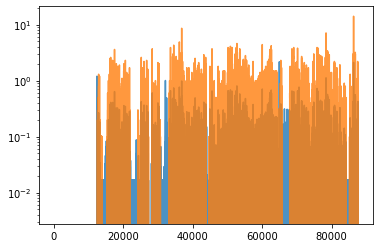

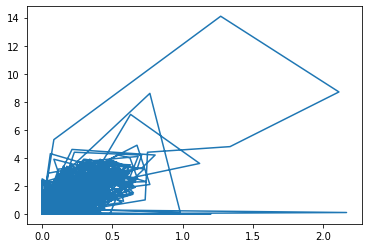

1475
(87672,)
(87672,)


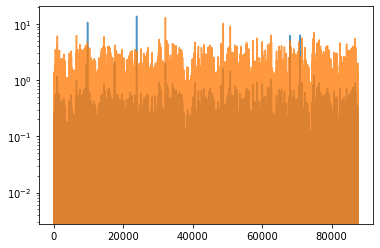

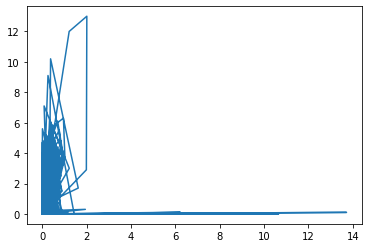

1485
(87672,)
(87672,)


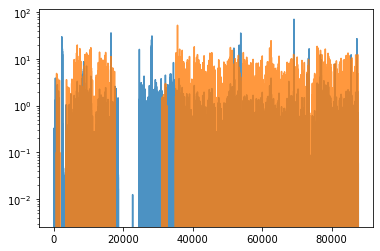

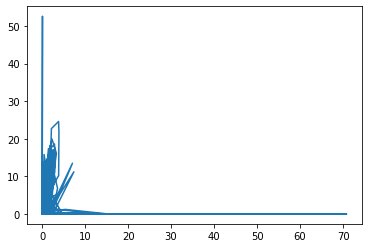

In [61]:
for gauge_id in gauges.columns:
    if gauge_id in gauges_clean.columns:
        print(gauge_id)
    # try:
        A = gauges.loc[:,gauge_id].resample('1h').agg(pd.Series.sum, skipna=False)
        B = gauges_clean.loc[:,gauge_id]
        common_index = A.dropna().index.intersection(B.index.dropna())
        A_ = A.loc[common_index].values
        B_ = B.loc[common_index].values
        print(A_.shape)
        print(B_.shape)
        plt.plot(A_,alpha = 0.8)
        plt.plot(B_,alpha = 0.8)
        plt.yscale('log')
        plt.show()
        
        plt.scatter(A_,B_,s = 0.1)
        plt.show()
    # except:
    #     print(gauge_id)

In [29]:
df2.STOD.value_counts()

1475    87504
1485    66480
1473    64128
1474    16536
1478     7776
Name: STOD, dtype: int64